In [2]:
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import seaborn as sns
import patsy
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.cross_validation import cross_val_predict

/Users/Marina/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
df=pd.read_csv('/Users/Marina/Documents/GA Data Science/projects/projects-capstone/clean_data.csv')

In [4]:
df_male=df.loc[df['gender'] == "Male"]

In [5]:
# C(dec)[T.1]	0.200214	0.02	0.167070	0.221267
# attr_o	0.072026	0.06	0.063325	0.080464
# like_o	0.058390	0.08	0.065774	0.189603
# pf_o_int	0.050327	0.10	0.021251	0.035438
# round	0.041314	0.02	0.018449	0.024118
# pf_o_att	0.035652	0.06	0.017979	0.027205
# prob_o	0.032315	0.04	0.042153	0.017558
# shar_o	0.031599	0.06	0.052779	0.022253
# fun_o	0.028191	0.04	0.032915	0.021888
# fun1_1	0.028021	0.02	0.017428	0.017361
# sinc_o	0.026788	0.02	0.019658	0.010509
# amb_o	0.025405	0.02	0.016344	0.013256
# shar1_1	0.023754	0.00	0.021813	0.006221
# age_o	0.022258	0.06	0.025336	0.022285
# pf_o_fun	0.021507	0.02	0.022025	0.014313
# pf_o_amb	0.020382	0.04	0.021415	0.020443
# pf_o_sin	0.019778	0.04	0.023218	0.013944
# pf_o_sha	0.016985	0.00	0.016816	0.017718
# date	0.015548	0.00	0.014920	0.000000
# met_o	0.013490	0.02	0.010824	0.002120
# fun2_1	0.013481	0.02	0.017681	0.017634


In [6]:
col_male=['attr_o','like_o','pf_o_int','round','pf_o_att','prob_o','shar_o','fun_o','fun1_1','sinc_o','amb_o',\
          'shar1_1','age_o','pf_o_fun','pf_o_amb','pf_o_sin','pf_o_sha','date','met_o','fun2_1']


data_male=df_male[col_male]
len(data_male)

# EXCLUDED attr1_1,imprace,intel2_1

2732

In [7]:
# col_male=['attr_o', 'like_o','fun_o','prob_o','shar_o','attr1_1','pf_o_int','amb_o','date','pf_o_att','fun1_1','movies',\
#          'met_o','sinc_o','round','age_o']

# data_male=df_male[col_male]
# len(data_male)

In [8]:
from sklearn.preprocessing import StandardScaler
x=data_male

X_norm =  StandardScaler().fit_transform(x);

df_stand=pd.DataFrame(X_norm, columns=data_male.columns)
df_stand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732 entries, 0 to 2731
Data columns (total 20 columns):
attr_o      2732 non-null float64
like_o      2732 non-null float64
pf_o_int    2732 non-null float64
round       2732 non-null float64
pf_o_att    2732 non-null float64
prob_o      2732 non-null float64
shar_o      2732 non-null float64
fun_o       2732 non-null float64
fun1_1      2732 non-null float64
sinc_o      2732 non-null float64
amb_o       2732 non-null float64
shar1_1     2732 non-null float64
age_o       2732 non-null float64
pf_o_fun    2732 non-null float64
pf_o_amb    2732 non-null float64
pf_o_sin    2732 non-null float64
pf_o_sha    2732 non-null float64
date        2732 non-null float64
met_o       2732 non-null float64
fun2_1      2732 non-null float64
dtypes: float64(20)
memory usage: 426.9 KB


In [9]:
categ_male= ['dec']
df_male_cat=df_male[categ_male]

len(df_male_cat)


2732

In [10]:
X = patsy.dmatrix('~ C(dec)', df_male_cat)

df_cat=pd.DataFrame(X, columns=X.design_info.column_names)
df_cat.head()

,Intercept,C(dec)[T.1]
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [11]:
df_male_final = pd.concat([df_cat, df_stand], axis=1)
len(df_male_final)

2732

In [12]:
y_male = df_male.match

#y_male = y_male.map(lambda x: 'no' if x ==0 else 'yes')

y_male = y_male.values

y_male

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
X_male=df_male_final

In [14]:
X_male.shape

(2732, 22)

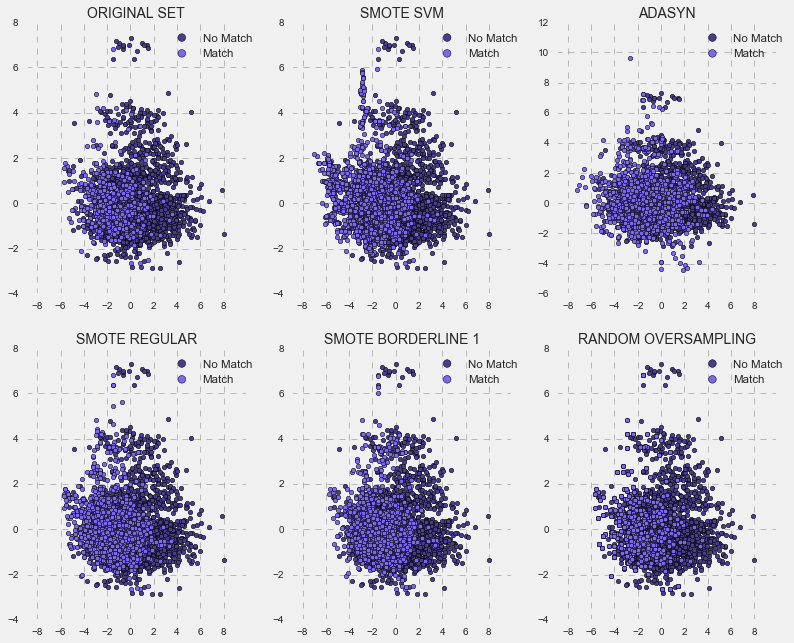

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE, ADASYN,RandomOverSampler
#plt.style.use(['fivethirtyeight','bmh'])

plt.style.use(['fivethirtyeight'])
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_male)


fig, ax = plt.subplots(2,3, figsize=(12,10))

ax[0][0].scatter(X_vis[y_male == 0, 0], X_vis[y_male == 0, 1], label="No Match", 
            edgecolor='black', linewidth=0.50,color='darkslateblue',s=20)
ax[0][0].scatter(X_vis[y_male == 1, 0], X_vis[y_male == 1, 1], label="Match",
            edgecolor='black', linewidth=0.50,color='mediumslateblue',s=20)
ax[0][0].set_title('ORIGINAL SET',fontsize = 14)
ax[0][0].grid(color='gray', linestyle='--', alpha=.5)
ax[0][0].legend(loc='best', fontsize = 11.5,markerscale=1.7, bbox_to_anchor=(1.07,1))
ax[0][0].set_xticks(range(-8,9, 2))
ax[0][0].set_xlim([-9, 10])
# for tick in ax[0][0].get_xticklabels():
#     tick.set_rotation(45)



sm = SMOTE(kind='svm')
X_resampled1, y_resampled1 = sm.fit_sample(X_male, y_male)
X_res_vis1 = pca.transform(X_resampled1)

ax[0][1].scatter(X_res_vis1[y_resampled1 == 0, 0], X_res_vis1[y_resampled1 == 0, 1],
            label="No Match", edgecolor='black', linewidth=0.50,color='darkslateblue',s=20)
ax[0][1].scatter(X_res_vis1[y_resampled1 == 1, 0], X_res_vis1[y_resampled1 == 1, 1],
            label="Match", edgecolor='black', linewidth=0.50,color='mediumslateblue',s=20)
ax[0][1].set_title('SMOTE SVM',fontsize = 14)
ax[0][1].grid(color='gray', linestyle='--', alpha=.5)
ax[0][1].legend(loc='best', fontsize = 11.5,markerscale=1.7, bbox_to_anchor=(1.07,1))
ax[0][1].set_xticks(range(-8,9, 2))
ax[0][1].set_xlim([-9, 10])

ada = ADASYN()
X_resampled2, y_resampled2 = ada.fit_sample(X_male, y_male)
X_res_vis2 = pca.transform(X_resampled2)

ax[0][2].scatter(X_res_vis2[y_resampled2 == 0, 0], X_res_vis2[y_resampled2 == 0, 1],
            label="No Match", edgecolor='black', linewidth=0.50,color='darkslateblue',s=20)
ax[0][2].scatter(X_res_vis2[y_resampled2 == 1, 0], X_res_vis2[y_resampled2 == 1, 1],
            label="Match", edgecolor='black', linewidth=0.50,color='mediumslateblue',s=20)
ax[0][2].set_title('ADASYN',fontsize = 14)
ax[0][2].grid(color='gray', linestyle='--', alpha=.5)
ax[0][2].legend(loc='best', fontsize = 11.5,markerscale=1.7, bbox_to_anchor=(1.07,1))
ax[0][2].set_xticks(range(-8,9, 2))
ax[0][2].set_xlim([-9, 10])

sm = SMOTE(kind='regular')
X_resampled3, y_resampled3 = sm.fit_sample(X_male, y_male)
X_res_vis3 = pca.transform(X_resampled3)

ax[1][0].scatter(X_res_vis3[y_resampled3 == 0, 0], X_res_vis3[y_resampled3 == 0, 1],
            label="No Match",  edgecolor='black', linewidth=0.50,color='darkslateblue',s=20)
ax[1][0].scatter(X_res_vis3[y_resampled3 == 1, 0], X_res_vis3[y_resampled3 == 1, 1],
            label="Match", edgecolor='black', linewidth=0.50,color='mediumslateblue',s=20)
ax[1][0].set_title('SMOTE REGULAR', fontsize = 14)
ax[1][0].grid(color='gray', linestyle='--', alpha=.5)
ax[1][0].legend(loc='best', fontsize = 11.5,markerscale=1.7, bbox_to_anchor=(1.07,1))
ax[1][0].set_xticks(range(-8,9, 2))
ax[1][0].set_xlim([-9, 10])

sm = SMOTE(kind='borderline1')
X_resampled4, y_resampled4 = sm.fit_sample(X_male, y_male)
X_res_vis4 = pca.transform(X_resampled4)

ax[1][1].scatter(X_res_vis4[y_resampled4 == 0, 0], X_res_vis4[y_resampled4 == 0, 1],
            label="No Match",  edgecolor='black', linewidth=0.50,color='darkslateblue',s=20)
ax[1][1].scatter(X_res_vis4[y_resampled4 == 1, 0], X_res_vis4[y_resampled4 == 1, 1],
            label="Match", edgecolor='black', linewidth=0.50,color='mediumslateblue',s=20)
ax[1][1].set_title('SMOTE BORDERLINE 1', fontsize = 14)
ax[1][1].grid(color='gray', linestyle='--', alpha=.5)
ax[1][1].legend(loc='best', fontsize = 11.5,markerscale=1.7, bbox_to_anchor=(1.07,1))
ax[1][1].set_xticks(range(-8,9, 2))
ax[1][1].set_xlim([-9, 10])

ros = RandomOverSampler()
X_resampled5, y_resampled5 = ros.fit_sample(X_male, y_male)
X_res_vis5 = pca.transform(X_resampled5)

ax[1][2].scatter(X_res_vis5[y_resampled5 == 0, 0], X_res_vis5[y_resampled5 == 0, 1],
            label="No Match",  edgecolor='black', linewidth=0.50,color='darkslateblue',s=20)
ax[1][2].scatter(X_res_vis5[y_resampled5 == 1, 0], X_res_vis5[y_resampled5 == 1, 1],
            label="Match", edgecolor='black', linewidth=0.50,color='mediumslateblue',s=20)
ax[1][2].set_title('RANDOM OVERSAMPLING',  fontsize = 14)
ax[1][2].grid(color='gray', linestyle='--', alpha=.5)
ax[1][2].legend(loc='best', fontsize = 11.5,markerscale=1.7, bbox_to_anchor=(1.07,1))
ax[1][2].set_xticks(range(-8,9, 2))
ax[1][2].set_xlim([-9, 10])
plt.show()

### Modeling with Original Set

In [16]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_male, y_male,
                                                    train_size=0.7,
                                                    random_state=10,
                                                    stratify=y_male)

cv_train = StratifiedKFold(y_train, n_folds=10, shuffle=True, random_state=10)
cv_test = StratifiedKFold(y_test, n_folds=10, shuffle=True, random_state=10)

lg= LogisticRegression(random_state=10)
dt = DecisionTreeClassifier(class_weight='balanced',min_samples_split=50,random_state=10)
bdt = BaggingClassifier(DecisionTreeClassifier(random_state=10),random_state=10)
rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
et = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
abc = AdaBoostClassifier(random_state=10)
gbst = GradientBoostingClassifier(random_state=10)
bnb = BernoulliNB()
svc = SVC(kernel='linear',probability=True,random_state=10)




def score(model, name):
    train_score = cross_val_score(model, X_train, y_train, cv=cv_train, n_jobs=-1)
    test_score = cross_val_score(model, X_test, y_test, cv=cv_test, n_jobs=-1)
    print "{} Training Accuracy Score:\t{:0.3} ± {:0.3}".format(name, train_score.mean().round(3),\
                                                                train_score.std().round(3))
    print "{} Test Accuracy Score:\t{:0.3} ± {:0.3}".format(name, test_score.mean().round(3),\
                                                                test_score.std().round(3))
    print " "
        
score(dt,"Decision Tree")
score(lg, "Logistic Regres")
score(bdt, "Bagging DT")
score(rf, "Random Forest")
score(et, "Extra Trees")
score(abc, "Ada Boost")
score(gbst, "Grad Boosting")
score(bnb, "Bernoulli NB")
score(svc, "SVC")


Decision Tree Training Accuracy Score:	0.832 ± 0.03
Decision Tree Test Accuracy Score:	0.835 ± 0.032
 
Logistic Regres Training Accuracy Score:	0.893 ± 0.022
Logistic Regres Test Accuracy Score:	0.898 ± 0.03
 
Bagging DT Training Accuracy Score:	0.893 ± 0.018
Bagging DT Test Accuracy Score:	0.898 ± 0.022
 
Random Forest Training Accuracy Score:	0.885 ± 0.024
Random Forest Test Accuracy Score:	0.869 ± 0.021
 
Extra Trees Training Accuracy Score:	0.881 ± 0.025
Extra Trees Test Accuracy Score:	0.883 ± 0.016
 
Ada Boost Training Accuracy Score:	0.886 ± 0.017
Ada Boost Test Accuracy Score:	0.892 ± 0.026
 
Grad Boosting Training Accuracy Score:	0.896 ± 0.02
Grad Boosting Test Accuracy Score:	0.89 ± 0.029
 
Bernoulli NB Training Accuracy Score:	0.882 ± 0.021
Bernoulli NB Test Accuracy Score:	0.901 ± 0.021
 
SVC Training Accuracy Score:	0.894 ± 0.018
SVC Test Accuracy Score:	0.903 ± 0.023
 


### Modeling with SMOT SVC

In [17]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_resampled1, y_resampled1,
                                                    train_size=0.7,
                                                    random_state=10,
                                                    stratify=y_resampled1)

cv_train = StratifiedKFold(y_train, n_folds=10, shuffle=True, random_state=10)
cv_test = StratifiedKFold(y_test, n_folds=10, shuffle=True, random_state=10)

lg1= LogisticRegression(random_state=10)
dt1 = DecisionTreeClassifier(class_weight='balanced',min_samples_split=50,random_state=10)
bdt1 = BaggingClassifier(DecisionTreeClassifier(random_state=10),random_state=10)
rf1 = RandomForestClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
et1= ExtraTreesClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
abc1 = AdaBoostClassifier(random_state=10)
gbst1 = GradientBoostingClassifier(random_state=10)
bnb1 = BernoulliNB()
svc1 = SVC(kernel='linear',probability=True,random_state=10)




def score(model, name):
    train_score = cross_val_score(model, X_train, y_train, cv=cv_train, n_jobs=-1)
    test_score = cross_val_score(model, X_test, y_test, cv=cv_test, n_jobs=-1)
    print "{} Training Accuracy Score:\t{:0.3} ± {:0.3}".format(name, train_score.mean().round(3),\
                                                                train_score.std().round(3))
    print "{} Test Accuracy Score:\t{:0.3} ± {:0.3}".format(name, test_score.mean().round(3),\
                                                                test_score.std().round(3))
    print " "
        
score(dt1,"Decision Tree")
score(lg1, "Logistic Regres")
score(bdt1, "Bagging DT")
score(rf1, "Random Forest")
score(et1, "Extra Trees")
score(abc1, "Ada Boost")
score(gbst1, "Grad Boosting")
score(bnb1, "Bernoulli NB")
score(svc1, "SVC")

Decision Tree Training Accuracy Score:	0.915 ± 0.013
Decision Tree Test Accuracy Score:	0.895 ± 0.027
 
Logistic Regres Training Accuracy Score:	0.899 ± 0.011
Logistic Regres Test Accuracy Score:	0.897 ± 0.02
 
Bagging DT Training Accuracy Score:	0.93 ± 0.02
Bagging DT Test Accuracy Score:	0.92 ± 0.022
 
Random Forest Training Accuracy Score:	0.932 ± 0.013
Random Forest Test Accuracy Score:	0.912 ± 0.019
 
Extra Trees Training Accuracy Score:	0.944 ± 0.01
Extra Trees Test Accuracy Score:	0.926 ± 0.023
 
Ada Boost Training Accuracy Score:	0.93 ± 0.012
Ada Boost Test Accuracy Score:	0.914 ± 0.02
 
Grad Boosting Training Accuracy Score:	0.94 ± 0.008
Grad Boosting Test Accuracy Score:	0.925 ± 0.013
 
Bernoulli NB Training Accuracy Score:	0.896 ± 0.017
Bernoulli NB Test Accuracy Score:	0.898 ± 0.023
 
SVC Training Accuracy Score:	0.9 ± 0.012
SVC Test Accuracy Score:	0.896 ± 0.019
 



### Modeling with ADASYN

In [18]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_resampled2, y_resampled2,
                                                    train_size=0.7,
                                                    random_state=10,
                                                    stratify=y_resampled2)

cv_train = StratifiedKFold(y_train, n_folds=10, shuffle=True, random_state=10)
cv_test = StratifiedKFold(y_test, n_folds=10, shuffle=True, random_state=10)

lg2= LogisticRegression(random_state=10)
dt2 = DecisionTreeClassifier(class_weight='balanced',min_samples_split=50,random_state=10)
bdt2 = BaggingClassifier(DecisionTreeClassifier(random_state=10),random_state=10)
rf2 = RandomForestClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
et2 = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
abc2 = AdaBoostClassifier(random_state=10)
gbst2 = GradientBoostingClassifier(random_state=10)
bnb2 = BernoulliNB()
svc2 = SVC(kernel='linear',probability=True,random_state=10)




def score(model, name):
    train_score = cross_val_score(model, X_train, y_train, cv=cv_train, n_jobs=-1)
    test_score = cross_val_score(model, X_test, y_test, cv=cv_test, n_jobs=-1)
    print "{} Training Accuracy Score:\t{:0.3} ± {:0.3}".format(name, train_score.mean().round(3),\
                                                                train_score.std().round(3))
    print "{} Test Accuracy Score:\t{:0.3} ± {:0.3}".format(name, test_score.mean().round(3),\
                                                                test_score.std().round(3))
    print " "
        
score(dt2,"Decision Tree")
score(lg2, "Logistic Regres")
score(bdt2, "Bagging DT")
score(rf2, "Random Forest")
score(et2, "Extra Trees")
score(abc2, "Ada Boost")
score(gbst2, "Grad Boosting")
score(bnb2, "Bernoulli NB")
score(svc2, "SVC")

Decision Tree Training Accuracy Score:	0.902 ± 0.017
Decision Tree Test Accuracy Score:	0.87 ± 0.019
 
Logistic Regres Training Accuracy Score:	0.878 ± 0.017
Logistic Regres Test Accuracy Score:	0.874 ± 0.024
 
Bagging DT Training Accuracy Score:	0.932 ± 0.017
Bagging DT Test Accuracy Score:	0.909 ± 0.024
 
Random Forest Training Accuracy Score:	0.936 ± 0.009
Random Forest Test Accuracy Score:	0.903 ± 0.027
 
Extra Trees Training Accuracy Score:	0.939 ± 0.011
Extra Trees Test Accuracy Score:	0.903 ± 0.021
 
Ada Boost Training Accuracy Score:	0.92 ± 0.015
Ada Boost Test Accuracy Score:	0.91 ± 0.022
 
Grad Boosting Training Accuracy Score:	0.929 ± 0.011
Grad Boosting Test Accuracy Score:	0.92 ± 0.014
 
Bernoulli NB Training Accuracy Score:	0.846 ± 0.019
Bernoulli NB Test Accuracy Score:	0.845 ± 0.033
 
SVC Training Accuracy Score:	0.872 ± 0.016
SVC Test Accuracy Score:	0.874 ± 0.02
 


### Modeling with SMOT REGULAR

In [19]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_resampled3, y_resampled3,
                                                    train_size=0.7,
                                                    random_state=10,
                                                    stratify=y_resampled5)

cv_train = StratifiedKFold(y_train, n_folds=10, shuffle=True, random_state=10)
cv_test = StratifiedKFold(y_test, n_folds=10, shuffle=True, random_state=10)

lg3= LogisticRegression(random_state=10)
dt3 = DecisionTreeClassifier(class_weight='balanced',min_samples_split=50,random_state=10)
bdt3 = BaggingClassifier(DecisionTreeClassifier(random_state=10),random_state=10)
rf3 = RandomForestClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
et3 = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
abc3 = AdaBoostClassifier(random_state=10)
gbst3 = GradientBoostingClassifier(random_state=10)
bnb3 = BernoulliNB()
svc3 = SVC(kernel='linear',probability=True,random_state=10)




def score(model, name):
    train_score = cross_val_score(model, X_train, y_train, cv=cv_train, n_jobs=-1)
    test_score = cross_val_score(model, X_test, y_test, cv=cv_test, n_jobs=-1)
    print "{} Training Accuracy Score:\t{:0.3} ± {:0.3}".format(name, train_score.mean().round(3),\
                                                                train_score.std().round(3))
    print "{} Test Accuracy Score:\t{:0.3} ± {:0.3}".format(name, test_score.mean().round(3),\
                                                                test_score.std().round(3))
    print " "
        
score(dt3,"Decision Tree")
score(lg3, "Logistic Regres")
score(bdt3, "Bagging DT")
score(rf3, "Random Forest")
score(et3, "Extra Trees")
score(abc3, "Ada Boost")
score(gbst3, "Grad Boosting")
score(bnb3, "Bernoulli NB")
score(svc3, "SVC")

Decision Tree Training Accuracy Score:	0.899 ± 0.016
Decision Tree Test Accuracy Score:	0.897 ± 0.028
 
Logistic Regres Training Accuracy Score:	0.891 ± 0.018
Logistic Regres Test Accuracy Score:	0.894 ± 0.026
 
Bagging DT Training Accuracy Score:	0.931 ± 0.016
Bagging DT Test Accuracy Score:	0.922 ± 0.02
 
Random Forest Training Accuracy Score:	0.937 ± 0.011
Random Forest Test Accuracy Score:	0.928 ± 0.017
 
Extra Trees Training Accuracy Score:	0.947 ± 0.007
Extra Trees Test Accuracy Score:	0.925 ± 0.024
 
Ada Boost Training Accuracy Score:	0.926 ± 0.014
Ada Boost Test Accuracy Score:	0.925 ± 0.019
 
Grad Boosting Training Accuracy Score:	0.939 ± 0.014
Grad Boosting Test Accuracy Score:	0.936 ± 0.016
 
Bernoulli NB Training Accuracy Score:	0.864 ± 0.016
Bernoulli NB Test Accuracy Score:	0.884 ± 0.013
 
SVC Training Accuracy Score:	0.891 ± 0.02
SVC Test Accuracy Score:	0.891 ± 0.026
 


### Modeling with SMOT BORDELINE 1

In [20]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_resampled4, y_resampled4,
                                                    train_size=0.7,
                                                    random_state=10,
                                                    stratify=y_resampled4)

cv_train = StratifiedKFold(y_train, n_folds=10, shuffle=True, random_state=10)
cv_test = StratifiedKFold(y_test, n_folds=10, shuffle=True, random_state=10)

lg4= LogisticRegression(random_state=10)
dt4 = DecisionTreeClassifier(class_weight='balanced',min_samples_split=50,random_state=10)
bdt4 = BaggingClassifier(DecisionTreeClassifier(random_state=10),random_state=10)
rf4 = RandomForestClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
et4 = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
abc4 = AdaBoostClassifier(random_state=10)
gbst4 = GradientBoostingClassifier(random_state=10)
bnb4 = BernoulliNB()
svc4 = SVC(kernel='linear',probability=True,random_state=10)




def score(model, name):
    train_score = cross_val_score(model, X_train, y_train, cv=cv_train, n_jobs=-1)
    test_score = cross_val_score(model, X_test, y_test, cv=cv_test, n_jobs=-1)
    print "{} Training Accuracy Score:\t{:0.3} ± {:0.3}".format(name, train_score.mean().round(3),\
                                                                train_score.std().round(3))
    print "{} Test Accuracy Score:\t{:0.3} ± {:0.3}".format(name, test_score.mean().round(3),\
                                                                test_score.std().round(3))
    print " "
        
score(dt4,"Decision Tree")
score(lg4, "Logistic Regres")
score(bdt4, "Bagging DT")
score(rf4, "Random Forest")
score(et4, "Extra Trees")
score(abc4, "Ada Boost")
score(gbst4, "Grad Boosting")
score(bnb4, "Bernoulli NB")
score(svc4, "SVC")

Decision Tree Training Accuracy Score:	0.899 ± 0.015
Decision Tree Test Accuracy Score:	0.881 ± 0.037
 
Logistic Regres Training Accuracy Score:	0.892 ± 0.016
Logistic Regres Test Accuracy Score:	0.883 ± 0.035
 
Bagging DT Training Accuracy Score:	0.932 ± 0.015
Bagging DT Test Accuracy Score:	0.905 ± 0.025
 
Random Forest Training Accuracy Score:	0.932 ± 0.018
Random Forest Test Accuracy Score:	0.909 ± 0.036
 
Extra Trees Training Accuracy Score:	0.945 ± 0.014
Extra Trees Test Accuracy Score:	0.919 ± 0.025
 
Ada Boost Training Accuracy Score:	0.926 ± 0.019
Ada Boost Test Accuracy Score:	0.919 ± 0.022
 
Grad Boosting Training Accuracy Score:	0.94 ± 0.016
Grad Boosting Test Accuracy Score:	0.92 ± 0.026
 
Bernoulli NB Training Accuracy Score:	0.867 ± 0.011
Bernoulli NB Test Accuracy Score:	0.866 ± 0.041
 
SVC Training Accuracy Score:	0.887 ± 0.017
SVC Test Accuracy Score:	0.888 ± 0.032
 


### Modeling with RANDOM OVERSAMPLING

In [357]:


from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_resampled5, y_resampled5,
                                                    train_size=0.7,
                                                    random_state=10,
                                                    stratify=y_resampled5)

cv_train = StratifiedKFold(y_train, n_folds=10, shuffle=True, random_state=10)
cv_test = StratifiedKFold(y_test, n_folds=10, shuffle=True, random_state=10)

lg5= LogisticRegression(random_state=10)
dt5 = DecisionTreeClassifier(class_weight='balanced',min_samples_split=50,random_state=10)
bdt5 = BaggingClassifier(DecisionTreeClassifier(random_state=10),random_state=10)
rf5 = RandomForestClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
et5 = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
abc5 = AdaBoostClassifier(random_state=10)
gbst5 = GradientBoostingClassifier(random_state=10)
bnb5 = BernoulliNB()
svc5 = SVC(kernel='linear',probability=True,random_state=10)




def score(model, name):
    train_score = cross_val_score(model, X_train, y_train, cv=cv_train, n_jobs=-1)
    test_score = cross_val_score(model, X_test, y_test, cv=cv_test, n_jobs=-1)
    print "{} Training Accuracy Score:\t{:0.3} ± {:0.3}".format(name, train_score.mean().round(3),\
                                                                train_score.std().round(3))
    print "{} Test Accuracy Score:\t{:0.3} ± {:0.3}".format(name, test_score.mean().round(3),\
                                                                test_score.std().round(3))
    print " "
        
score(dt5,"Decision Tree")
score(lg5, "Logistic Regres")
score(bdt5, "Bagging DT")
score(rf5, "Random Forest")
score(et5, "Extra Trees")
score(abc5, "Ada Boost")
score(gbst5, "Grad Boosting")
score(bnb5, "Bernoulli NB")
score(svc5, "SVC")

Decision Tree Training Accuracy Score:	0.891 ± 0.019
Decision Tree Test Accuracy Score:	0.87 ± 0.021
 
Logistic Regres Training Accuracy Score:	0.88 ± 0.012
Logistic Regres Test Accuracy Score:	0.881 ± 0.022
 
Bagging DT Training Accuracy Score:	0.948 ± 0.016
Bagging DT Test Accuracy Score:	0.917 ± 0.025
 
Random Forest Training Accuracy Score:	0.952 ± 0.018
Random Forest Test Accuracy Score:	0.913 ± 0.023
 
Extra Trees Training Accuracy Score:	0.968 ± 0.01
Extra Trees Test Accuracy Score:	0.911 ± 0.019
 
Ada Boost Training Accuracy Score:	0.895 ± 0.016
Ada Boost Test Accuracy Score:	0.884 ± 0.033
 
Grad Boosting Training Accuracy Score:	0.916 ± 0.012
Grad Boosting Test Accuracy Score:	0.907 ± 0.021
 
Bernoulli NB Training Accuracy Score:	0.845 ± 0.02
Bernoulli NB Test Accuracy Score:	0.851 ± 0.037
 
SVC Training Accuracy Score:	0.878 ± 0.014
SVC Test Accuracy Score:	0.879 ± 0.027
 


In [358]:
et5.get_params().keys()

['warm_start',
 'oob_score',
 'n_jobs',
 'verbose',
 'max_leaf_nodes',
 'bootstrap',
 'min_samples_leaf',
 'n_estimators',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'criterion',
 'random_state',
 'min_impurity_split',
 'max_features',
 'max_depth',
 'class_weight']

In [359]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.grid_search import RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_resampled5, y_resampled5,
                                                    train_size=0.7,
                                                    random_state=10,
                                                    stratify=y_resampled5)

# param_grid = {"max_depth": [3,5,10,20,30],
#              "max_features": [16, 20,80, 150]} 

param_grid = {"max_depth": [30,50,70,90,100],
             "max_features": [None, "auto"],
             "min_samples_split": [2, 5, 7,10],
             'n_estimators': [16, 32,48]} 


# param_grid = {"max_depth": [3,5,10,20,30],
#           "max_features": [None, "auto"],
#           "min_samples_leaf": [10,50,70],
#           "min_samples_split": [2, 5, 7,10],
#           'n_estimators': [16, 32,48] 
#          } 

# param_grid = {'n_estimators': [10]} 

# param_grid = {"min_samples_split": [2, 5, 7,10],
#               "max_depth": [3,5,10,20,30],
#               "min_samples_leaf": [50,70,100],
#               "max_leaf_nodes": [None, 5, 10, 20],
#               'n_estimators': [50,70,100],
#               "max_features": [None, "auto",16]

#               }


#               "oob_score": True,
#               "bootstrap": [True, False],




clf = GridSearchCV(et5,param_grid=param_grid, n_jobs=-1, cv=cv_train)


clf.fit(X_train, y_train)

print clf.best_score_
print clf.best_params_
print clf.best_estimator_

0.967036450079
{'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 16, 'max_depth': 30}
ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=30, max_features='auto',
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=16, n_jobs=-1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


In [361]:
clf.fit(X_train, y_train)

train_acc = accuracy_score(y_true=y_train, y_pred=clf.predict(X_train))


# print('Accuracy %.2f%% (average)' %
#       (100 * clf.best_score_))
# print('Best Parameters: %s' % et5.best_params_)
print('Training Accuracy: %.2f%%' % (100 * train_acc))

Training Accuracy: 100.00%


In [362]:
clf.fit(X_train, y_train)

test_acc = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))


# print('Accuracy %.2f%% (average)' %
#       (100 * clf.best_score_))
# print('Best Parameters: %s' % clf.best_params_)
print('Test Accuracy: %.2f%%' % (100 * test_acc))

Test Accuracy: 97.34%


In [363]:
best_clf = clf.best_estimator_
final_model = best_clf.fit(X_resampled5,y_resampled5)
best_acc=accuracy_score(y_true=y_resampled5, y_pred=final_model.predict(X_resampled5))

print('Final Model Accuracy: %.2f%%' % (100 * best_acc))
print ' '
print final_model

Final Model Accuracy: 100.00%
 
ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=30, max_features='auto',
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=16, n_jobs=-1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)


In [364]:
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)
y_pred_all=clf.predict(X_resampled5)





matrix1 = np.array(confusion_matrix(y_train,y_pred_train))

confusion1 = pd.DataFrame(matrix1, index=['No Match','Match'],\
                     columns=['No Match','Match'])

matrix2 = np.array(confusion_matrix(y_test, y_pred_test))


confusion2 = pd.DataFrame(matrix2, index=['No Match','Match'],\
                     columns=['No Match','Match'])

matrix3 = np.array(confusion_matrix(y_resampled5,y_pred_all))

confusion3 = pd.DataFrame(matrix3, index=['No Match','Match'],\
                     columns=['No Match','Match'])


In [365]:

print accuracy_score(y_train, y_pred_train)
print classification_report(y_train, y_pred_train)

1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1578
          1       1.00      1.00      1.00      1577

avg / total       1.00      1.00      1.00      3155



In [366]:
print accuracy_score(y_test, y_pred_test)
print classification_report(y_test, y_pred_test)

1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       676
          1       1.00      1.00      1.00       677

avg / total       1.00      1.00      1.00      1353



In [367]:
print accuracy_score(y_resampled5, y_pred_all)
print classification_report(y_resampled5, y_pred_all)

1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2254
          1       1.00      1.00      1.00      2254

avg / total       1.00      1.00      1.00      4508



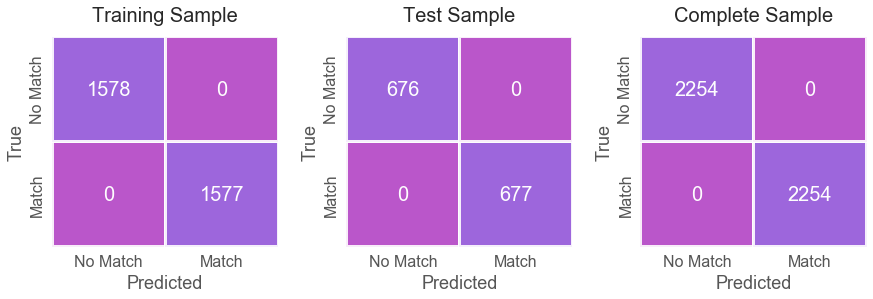

In [368]:
plt.style.use(['ggplot'])

fig, axes = plt.subplots(1,3, figsize=(12,3.5))
# plt.tight_layout(h_pad=2)
plt.tight_layout(w_pad=4.0)

colors=['red']

#cmap = sns.diverging_palette(280, 300, as_cmap=True) 
cmap = sns.diverging_palette(300, 280, as_cmap=True)
sns.heatmap(confusion1, annot=True, annot_kws={"size": 20},cmap=cmap,fmt='g', cbar=False,linewidths=2,ax=axes[0], alpha=.9)
# plt.xticks(rotation=0, fontsize=16)
# plt.yticks(fontsize=16)
axes[0].set_xticklabels(['No Match', 'Match'], fontsize=16)
axes[0].set_yticklabels(['Match', 'No Match'], fontsize=16)
axes[0].set_ylabel('True', fontsize=18)
axes[0].set_xlabel('Predicted', fontsize=18)
axes[0].set_title("Training Sample", fontsize=20, y=1.05)

sns.heatmap(confusion2, annot=True, annot_kws={"size": 20},cmap=cmap,fmt='g', cbar=False,linewidths=2,ax=axes[1], alpha=.9)
axes[1].set_xticklabels(['No Match', 'Match'], fontsize=16)
axes[1].set_yticklabels(['Match', 'No Match'], fontsize=16)
axes[1].set_ylabel('True', fontsize=18)
axes[1].set_xlabel('Predicted', fontsize=18)
axes[1].set_title("Test Sample", fontsize=20, y=1.05)

sns.heatmap(confusion3, annot=True, annot_kws={"size": 20},cmap=cmap,fmt='g',cbar=False,linewidths=2,ax=axes[2], alpha=.9)
axes[2].set_xticklabels(['No Match', 'Match'], fontsize=16)
axes[2].set_yticklabels(['Match', 'No Match'], fontsize=16)
axes[2].set_ylabel('True', fontsize=18)
axes[2].set_xlabel('Predicted', fontsize=18)
axes[2].set_title("Complete Sample", fontsize=20, y=1.05)

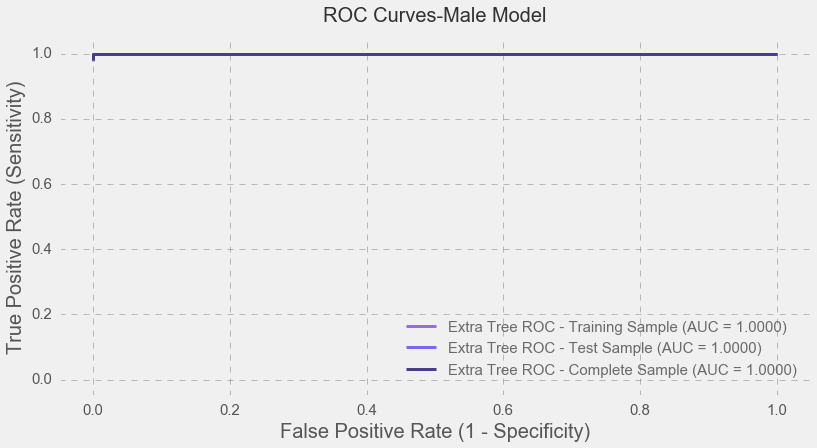

In [369]:
plt.style.use(['fivethirtyeight'])

plt.figure(figsize=(12,6))

y_pred_train1 = clf.predict_proba(X_train)[:,1]
y_pred_test1 = clf.predict_proba(X_test)[:,1]
y_pred_all1 = clf.predict_proba(X_resampled5)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_train1)
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, y_pred_test1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_resampled5, y_pred_all1)


ROC_AUC = auc(fpr, tpr)
ROC_AUC1 = auc(fpr1, tpr1)
ROC_AUC2 = auc(fpr2, tpr2)



plt.plot(fpr, tpr, label='Extra Tree ROC - Training Sample (AUC = %0.4f)' % ROC_AUC,color='mediumpurple', linewidth=3)
plt.plot(fpr1, tpr1, label='Extra Tree ROC - Test Sample (AUC = %0.4f)' % ROC_AUC1, color='mediumslateblue',linewidth=3)
plt.plot(fpr2, tpr2, label='Extra Tree ROC - Complete Sample (AUC = %0.4f)' % ROC_AUC2, color='darkslateblue',linewidth=3)


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=20)
plt.ylabel('True Positive Rate (Sensitivity)',fontsize=20)
plt.grid(color='gray', linestyle='--', alpha=.5)

l=plt.legend(loc='lower right', fontsize=15,bbox_to_anchor=(1, 0.015))
for text in l.get_texts():
    text.set_color("dimgray")

plt.title('ROC Curves-Male Model', color="black", alpha=0.8,fontsize=20, y=1.03)
plt.show()